# Sydney Airbnb

## Abstracto

Este dataset se corresponde a las ofertas de alojamientos en Airbnb en la ciudad de Sydney, en diciembre de 2018. El mismo fue obtenido desde Kaggle, cuya fuente original es InsideAirbnb, un repositorio de datos actualizados sobre cualquier ciudad del mundo.

La base de datos contiene información sobre 36.000 alojamientos publicados en Airbnb en la región metropolitana de Sydney y sus características como la descripción, quien es su anfitrión, el barrio en el que esta ubicado, sus coordenadas, el tipo de alojamiento y el precio por noche. También se detalla la cantidad de reseñas totales y por mes, la fecha de la ultima reseña y la cantidad de días en los cuales está disponible por año. Además, podemos encontrar información mucho más detallada sobre cada alojamiento en otros archivos csv que contienen datos sobre la performance de los anfitriones, cantidad y tipos de camas, asi como la cantidad de cuartos y baños, la tarifa de limpieza y de seguridad, los metros cuadrados de la propiedad, los scores de las reseñas, etc.

El objetivo principal de esta base de datos es predecir el precio por noche de un alojamiento en base a sus características. Esta estimación puede ser muy útil para los anfitriones de Airbnb a la hora de definir el precio por noche de una nueva publicación que deseen realizar, o la modificación de alguna ya existente. Puede ser especialmente valioso para alguien que no tiene experiencia en Airbnb y no sabe que factores tener en cuanta para definir este precio por noche.

Fuentes de datos: https://www.kaggle.com/datasets/tylerx/sydney-airbnb-open-data?select=listings_summary_dec18.csv

Fuente original, con datos actualizados de cualquier ciudad: http://insideairbnb.com/get-the-data/

### Audiencia
El proyecto apunta a ser de utilidad para orientar en la toma de decisiones a las partes interesadas en el negocio de Airbnb ya sea anfitriones actuales y potenciales, viajeros, usuarios en aplicaciones de la competencia como por ejemplo Booking, los mismos empleados en Airbnb para ofrecerlo como servicio, entre otros.


### Definición del objetivo
Se realizará, a partir de las variables más sensibles de los datos seleccionados, la predicción del precio por noche de un nuevo alojamiento en Airbnb (Sydney) en función de su ubicación, el tipo de alojamiento, la cantidad de reseñas y el barrio de la ciudad en el que se encuentra. A partir de este análisis se podrá comprender mejor el comportamiento y rendimiento de los viajeros y anfitriones en la plataforma, habrá una buena orientación para las iniciativas de marketing y se podrán efectuar recomendaciones para los anfitriones, haciendo que sus alojamientos sean más rentables que antes.

### Contexto comercial
Airbnb es una plataforma en línea que permite a individuos alquilar alojamientos para estancias de corta duración. Es un gran ecosistema de anfitriones e inquilinos que buscan oportunidades para alquilar un espacio de más en su propiedad/alojarse a un precio conveniente mientras se viaja. Incluso los anfitriones con más alojamientos son en su mayoría pequeñas inmobiliarias con una oferta limitada, ya que la plataforma busca proporcionar un servicio personalizado y centrado en la experiencia del cliente. En consecuencia, su capacidad para analizar tendencias a gran escala y establecer precios óptimos es limitada, ya que la mayoría de los anfitriones cuenta con solo un alojamiento publicado y poco conociemiento sobre el mercado en general. De esta manera, no se tiene una certeza de que precio es competitivo para publicar un nuevo alojamiento, teniendo en cuenta las características únicas del mismo.


### Problema comercial 


*   ¿Qué características son más relevantes para el precio por noche de un alojamiento de Airbnb en Sydney?
*   ¿Cómo y a qué precio por noche debería publicar su alojamiento un anfitrión (potencial o existente)?


### Contexto analítico
El dataset seleccionado fue obtenido en Kaggle se encuentra en formato CSV. Hay información relativa al anfitrión (id, nombre), la ubicación del alojamiento (barrio, latitud, longitud), el tipo de alojamiento, las reseñas (fecha de la última, cantidad por mes) y disponibilidad para alquilar al año.


## Preguntas e hipótesis

A continuación se presentan algunas preguntas e hipótesis basadas en las variables del dataset:

1. ¿Hay una relación entre el barrio en el que está ubicado un alojamiento y su precio por noche?
Hipótesis: Es muy probable que algunos barrios más exlusivos, o bien céntricos sean más caros debido a se cercanía  a los sitios turísticos de la ciudad o por otro lado a la exclusividad y lujo de la zona.

2. ¿Hay una relación entre la latitud/longitud de las coordenadas un alojamiento y su precio por noche?
Hipótesis: Además del barrio en el que se ubique, es posible que haya una tendencia generalizada en la cual sea más caro cuanto más al norte/sur y cuanto más cerca de la costa se encuentre, como sucede en muchas ciudades.

3. ¿Hay una relación entre el tipo de alojamiento y su precio por noche?
Hipótesis: Es muy probable que los alojamientos que sean de tipo departamento entero sean más costosos que los de cuarto privado, y estos que los de cuarto compartido.

4. ¿Hay una relación entre la cantidad de reseñas que tiene un alojamiento y su precio por noche?
Hipótesis: Es notorio que los alojamientos con mayor cantidad de reseñas son los más populares, factor que puede influir directamente en el precio si el mismo es muy reservado por su gran relación precio-calidad.

Se importan las librerías que se utilizarán para trabajar con los datos y visualizarlos.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from   scipy import stats
import statsmodels.formula.api as sm

In [2]:
# cambio el estilo de matplotlib para obtener visualizaciones más estéticas
mpl.style.use('bmh')

Se decidió utilizar el archivo con la información más detallada de cada alojamiento de Airbnb, incluyendo detalles del host, de los reviews, de los barrios de la ciudad, siendo un archivo de 96 columnas.

In [3]:
# cargamos el archivo csv con la función de pandas
df = pd.read_csv("syd_listings.csv", sep=",", encoding='Latin-1')
# vemos una primera muestra del dataset
df.head()

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_22900\2484012402.py:2: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("syd_listings.csv", sep=",", encoding='Latin-1')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,https://www.airbnb.com/rooms/12351,2.018120e+13,12/7/2018,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,none,"Pyrmont is an inner-city village of Sydney, on...",...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,https://www.airbnb.com/rooms/14250,2.018120e+13,12/7/2018,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",none,Balgowlah Heights is one of the most prestigio...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,0.03
2,15253,https://www.airbnb.com/rooms/15253,2.018120e+13,12/7/2018,Stunning Penthouse Apartment In Heart Of The City,Penthouse living in a great central location: ...,"A charming two-level, two-bedroom, two-bathroo...",Penthouse living in a great central location: ...,none,The location is really central and there is nu...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,2,3.63
3,20865,https://www.airbnb.com/rooms/20865,2.018120e+13,12/7/2018,3 BED HOUSE + 1 BED STUDIO Balmain,Hi! We are a married professional couple with ...,HOUSE : _________ * DUCTED AIR CONDITIONING IN...,Hi! We are a married professional couple with ...,none,BALMAIN is an older inner city village / subur...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.18
4,26174,https://www.airbnb.com/rooms/26174,2.018120e+13,12/7/2018,"COZY PRIVATE ROOM, GREAT LOCATION!",NaN,"Double bed in decent sized bedroom, in two bed...","Double bed in decent sized bedroom, in two bed...",none,NaN,...,f,NaN,NaN,f,f,moderate,f,f,1,0.45


In [4]:
# se deciden eliminar algunas  muchas columnas que no serán de utilidad para el análisis, ya que contienen información con mucho texto, links, etc.
df.drop(['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered', 'neighborhood_overview', 'neighbourhood', \
         'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url','medium_url', 'picture_url', 'xl_picture_url', 'host_url', \
         'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', \
         'state', 'zipcode','market', 'smart_location','country_code','country', 'calendar_updated', 'has_availability', 'availability_30', \
         'availability_60', 'availability_90', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names', 'weekly_price', \
         'monthly_price', 'square_feet', 'host_name'], axis = 'columns', inplace=True)
df.head(1)

,id,name,description,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,17061,5/14/2009,within a few hours,100%,f,Pyrmont,2.0,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


### Data Wrangling

In [5]:
# una muestra del dataset
df.head()

,id,name,description,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,17061,5/14/2009,within a few hours,100%,f,Pyrmont,2.0,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",55948,11/20/2009,within a few hours,90%,f,Balgowlah,2.0,...,8.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2,0.03
2,15253,Stunning Penthouse Apartment In Heart Of The City,Penthouse living in a great central location: ...,59850,12/3/2009,within an hour,100%,f,Darlinghurst,2.0,...,9.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,2,3.63
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,Hi! We are a married professional couple with ...,64282,12/19/2009,within a day,100%,t,Balmain/Birchgrove,2.0,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1,0.18
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!","Double bed in decent sized bedroom, in two bed...",110561,4/19/2010,NaN,NaN,f,Bellevue Hill,1.0,...,10.0,10.0,9.0,f,f,moderate,f,f,1,0.45


In [6]:
# tamaño del dataset
df.shape

(36662, 53)

In [7]:
df.columns

Index(['id', 'name', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancella

In [8]:
# su estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36662 non-null  int64  
 1   name                              36650 non-null  object 
 2   description                       36116 non-null  object 
 3   host_id                           36662 non-null  int64  
 4   host_since                        36656 non-null  object 
 5   host_response_time                18778 non-null  object 
 6   host_response_rate                18778 non-null  object 
 7   host_is_superhost                 36656 non-null  object 
 8   host_neighbourhood                24844 non-null  object 
 9   host_listings_count               36656 non-null  float64
 10  host_total_listings_count         36656 non-null  float64
 11  host_verifications                36662 non-null  object 
 12  host

In [9]:
# Me fijo cuantos datos nulos hay por columna
df.isnull().sum()

id                                      0
name                                   12
description                           546
host_id                                 0
host_since                              6
host_response_time                  17884
host_response_rate                  17884
host_is_superhost                       6
host_neighbourhood                  11818
host_listings_count                     6
host_total_listings_count               6
host_verifications                      0
host_has_profile_pic                    6
host_identity_verified                  6
street                                  0
neighbourhood_cleansed                  0
city                                   29
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                         

In [10]:
# analizo porcentaje de nulos por columna
pd.set_option('display.max_rows', None) 
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

host_response_rate             48.780754
host_response_time             48.780754
security_deposit               37.008347
review_scores_value            35.996400
review_scores_location         35.988217
review_scores_checkin          35.985489
review_scores_accuracy         35.925481
review_scores_communication    35.887295
review_scores_cleanliness      35.870929
review_scores_rating           35.802739
last_review                    32.559598
first_review                   32.559598
reviews_per_month              32.559598
host_neighbourhood             32.235012
cleaning_fee                   28.743658
description                     1.489280
beds                            0.106377
city                            0.079101
bathrooms                       0.051825
name                            0.032731
bedrooms                        0.024549
host_has_profile_pic            0.016366
host_total_listings_count       0.016366
host_listings_count             0.016366
host_is_superhos

In [11]:
# elimino columna con % de nulos > 45%
df.drop(['host_response_time', 'host_response_rate'], axis = 'columns', inplace=True)
df.head(1)

,id,name,description,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


In [12]:
# Se reemplazan los nulos de las siguientes columnas de reviews con la moda para no agregar ruido

df.fillna({'review_scores_value':df['review_scores_value'].mode}, inplace=True)
df.fillna({'review_scores_location':df['review_scores_location'].mode}, inplace=True)
df.fillna({'review_scores_checkin':df['review_scores_checkin'].mode}, inplace=True)
df.fillna({'review_scores_accuracy':df['review_scores_accuracy'].mode}, inplace=True)
df.fillna({'review_scores_communication':df['review_scores_communication'].mode}, inplace=True)
df.fillna({'review_scores_cleanliness':df['review_scores_cleanliness'].mode}, inplace=True)
df.fillna({'review_scores_rating':df['review_scores_rating'].mode}, inplace=True)
df.fillna({'reviews_per_month':df['reviews_per_month'].mode}, inplace=True)

# Se reemplaza los nulos con el 0 en la columnas ...

df.fillna({'security_deposit':0}, inplace=True)
df.fillna({'first_review':0}, inplace=True)
df.fillna({'last_review':0}, inplace=True)
df.fillna({'host_neighbourhood':0}, inplace=True)
df.fillna({'cleaning_fee':0}, inplace=True)

In [13]:
# restantes se les imputa 0
df.fillna(0, inplace=True)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,36662.0,NaN,NaN,NaN,18520829.652256,8473884.00175,12351.0,11704613.5,20273497.0,25244052.5,30593866.0
name,36662,35858,Home away from home,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,36662.0,35422.0,0.0,546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,36662.0,NaN,NaN,NaN,65616201.864137,63745327.975146,8346.0,15060221.0,41348188.0,105360535.5,229479027.0
host_since,36662,2954,6/22/2015,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,36662,3,f,32144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_neighbourhood,36662.0,245.0,0.0,11818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,36662.0,NaN,NaN,NaN,8.560199,30.491996,0.0,1.0,1.0,2.0,474.0
host_total_listings_count,36662.0,NaN,NaN,NaN,8.560199,30.491996,0.0,1.0,1.0,2.0,474.0
host_verifications,36662,395,"['email', 'phone', 'reviews', 'jumio', 'govern...",4769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Outliers

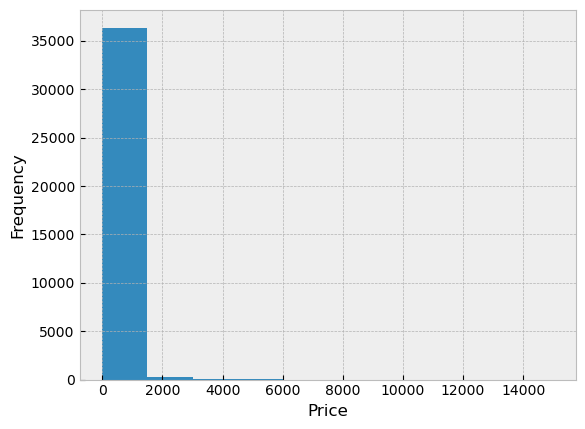

In [15]:
# histograma de precios
df['price'].plot(kind='hist')
plt.xlabel('Price')
plt.show()

Se observa que practicamente todos los precios estan entre 0 - 1000 USD la noche, teniendo algunos alojamientos excesivamente caros que dificultan el análisis.

In [16]:
# funcion para aplicar metodo IQR al dataframe
def imputar_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, # si el valor es mayor al q3
                 df.median(), # reemplazo por la media
                 np.where(df < lower, # en caso contrario, si es menor que el lower limit
                          df.median(), # tambien reemplazar por la media
                          df) # si ninguna de las dos cosas anteriores ocurre, no cambio nada
                 )
   return df

In [17]:
df[['price','cleaning_fee','security_deposit']]=imputar_outliers_IQR(df[['price','cleaning_fee','security_deposit']])
df.head(1)

,id,name,description,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


Se aplica la transformacion a las variables relacionadas a lo que paga un viajero por alojarse, es decir el precio, la tarifa de limpieza y el deposito de garantía.

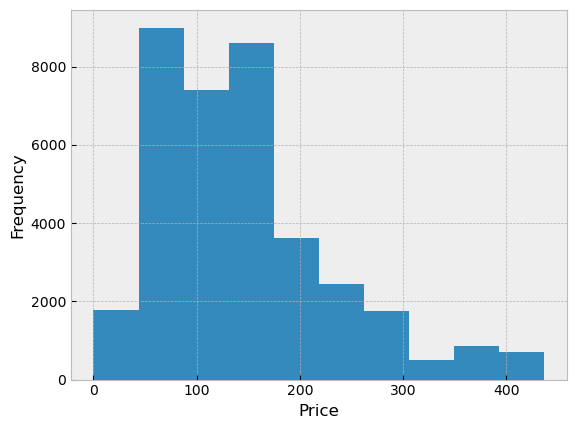

In [18]:
# histograma de precios con df ya modificado
df['price'].plot(kind='hist')
plt.xlabel('Price')
plt.show()

Se observa una normalización en la forma del histograma, donde se tienen precios más comunes entre 0 - 400 USD por noche.

## Análisis Exploratorio de Datos (EDA)

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_22900\100277106.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='jet')


<Axes: >

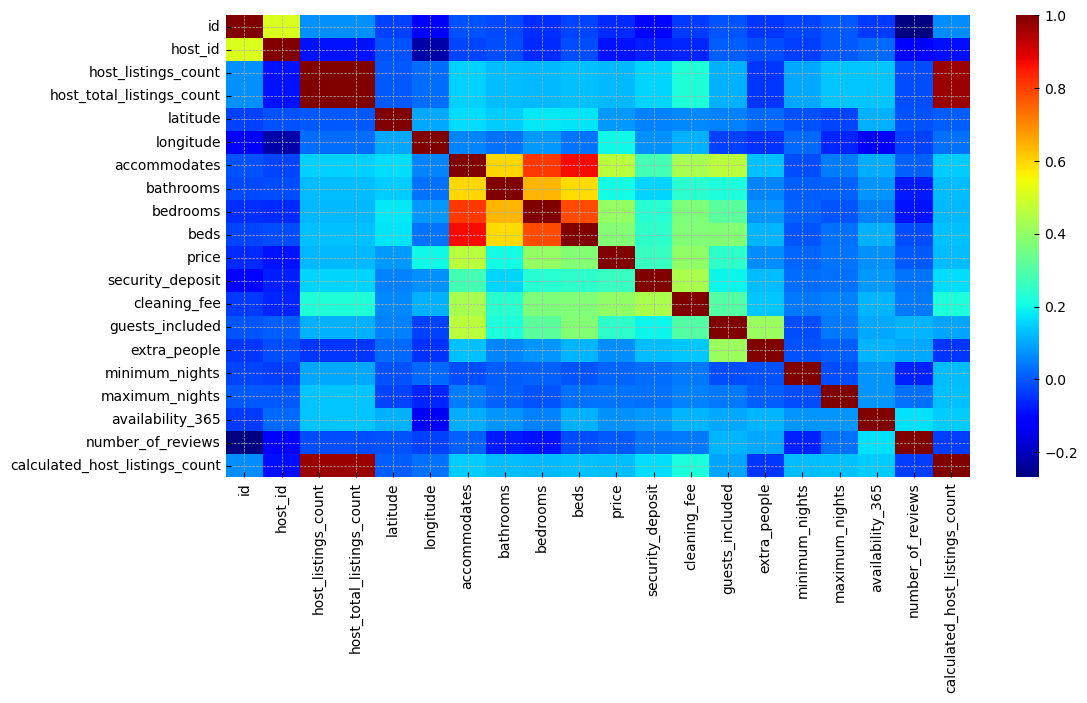

In [19]:
# hago un heatmap para entender que variables se correlacionan más con el precio
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='jet')

In [20]:
# calculo estas correlaciones para ver las más fuertes
corr    = df.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False).round(2)

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_22900\3542821052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr    = df.corr()


price                             1.00
accommodates                      0.46
bedrooms                          0.40
cleaning_fee                      0.40
beds                              0.38
security_deposit                  0.26
guests_included                   0.25
bathrooms                         0.21
longitude                         0.20
calculated_host_listings_count    0.12
host_total_listings_count         0.12
host_listings_count               0.12
latitude                          0.08
availability_365                  0.07
extra_people                      0.06
maximum_nights                    0.04
minimum_nights                    0.02
number_of_reviews                 0.00
Name: price, dtype: float64

* Respondiendo a la Pregunta 1

In [21]:
# Calculo el precio promedio (por noche) de cada barrio de Sydney
priceperneighbourhood = df.groupby('neighbourhood_cleansed').price.mean()
# Ordeno de mayor a menor
PPNsorted = priceperneighbourhood.round(2).sort_values(ascending=False)
PPNsorted

neighbourhood_cleansed
Pittwater           178.28
Manly               176.06
Mosman              165.40
Woollahra           160.13
Leichhardt          158.56
Waverley            157.31
Warringah           156.44
North Sydney        149.81
Sydney              148.69
Hunters Hill        148.38
Sutherland Shire    143.90
Auburn              141.49
Randwick            135.84
Willoughby          134.74
Ku-Ring-Gai         131.88
Canada Bay          129.27
Lane Cove           127.76
Penrith             121.83
Liverpool           119.49
Campbelltown        114.39
Marrickville        112.78
Rockdale            111.71
Hornsby             109.46
The Hills Shire     108.15
Botany Bay          106.90
Hurstville          105.49
Ryde                103.56
Ashfield            103.46
Canterbury          101.08
Parramatta           98.77
Burwood              95.60
Camden               95.55
City Of Kogarah      94.99
Strathfield          93.77
Holroyd              90.25
Bankstown            89.27
Black

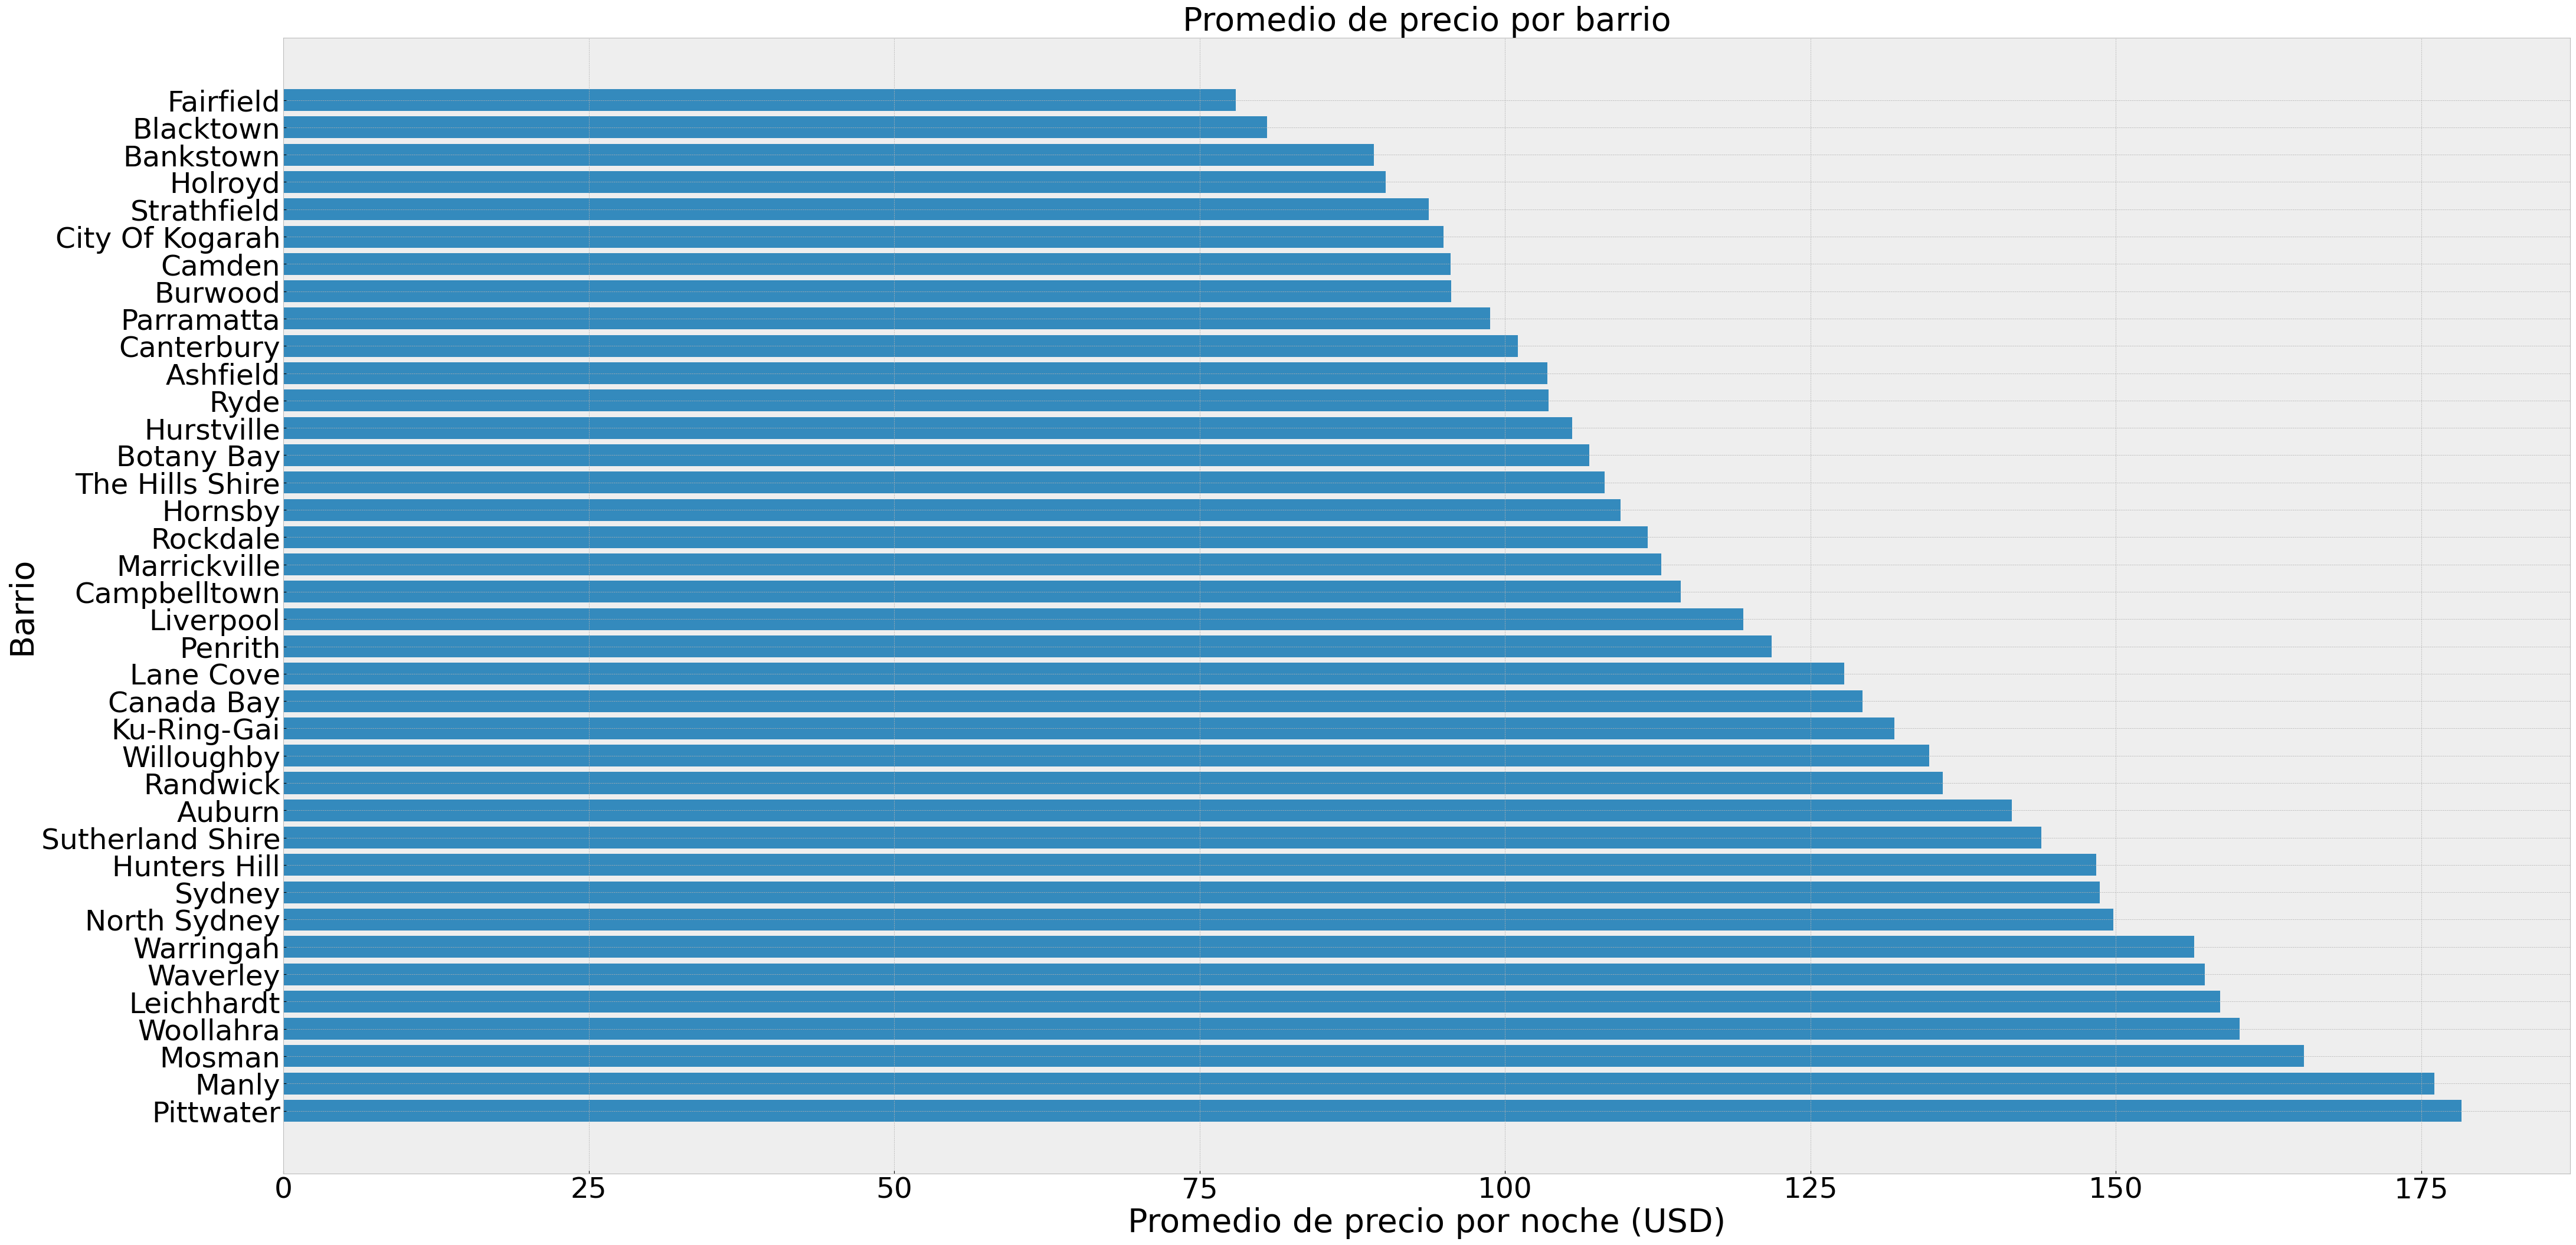

In [22]:
# Hago un grafico de barras con el precio promedio por barrio
fig, ax = plt.subplots(figsize=(50,25))
ax.barh(PPNsorted.index, PPNsorted.values)
ax.set_title('Promedio de precio por barrio', fontsize= 40)
ax.set_ylabel('Barrio', fontsize= 40)
ax.set_xlabel('Promedio de precio por noche (USD)', fontsize= 40)
ax.tick_params(axis='both', labelsize=35)

Los barrios de Pittwater y Manly tiene un precio promedio significativamente más elevado que los demás.

Se puede deducir que ciertos barrios tienen la posibilidad de definir precios muy altos debido a su exclusividad, en lugares ciertamente lujosos en las afueras de la ciudad.

* Respondiendo a la Pregunta 2

In [23]:
# filtro precios menores a 400 para analizar rangos "normales" de precios y que la escala de colores en el mapa sea de utilidad
df_map = df[df['price'] < 400]

Text(0, 0.5, 'Longitud')

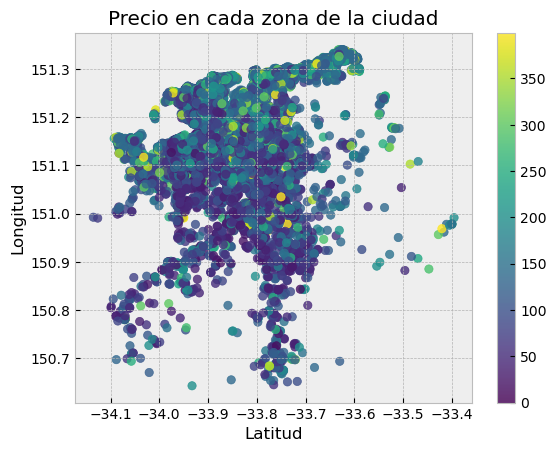

In [24]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_map['latitude'], df_map['longitude'], c=df_map['price'], alpha= 0.8)
fig.colorbar(mapeo_colores)
ax.set_title('Precio en cada zona de la ciudad')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

Se puede observar en el mapa una gran variabilidad en cuanto a los precios en las distintas zonas de la ciudad, pero claramente los precios más elevados estan en el norte de Sydney. Como se vio anteriormente, los barrios con mayores precios promedio fueron Pittwater y Mosman, entre otros, y no es casualidad que estos se hallen en el norte.

Text(0.5, 1.0, 'Precios por noche en función de la longitud (sur-norte)')

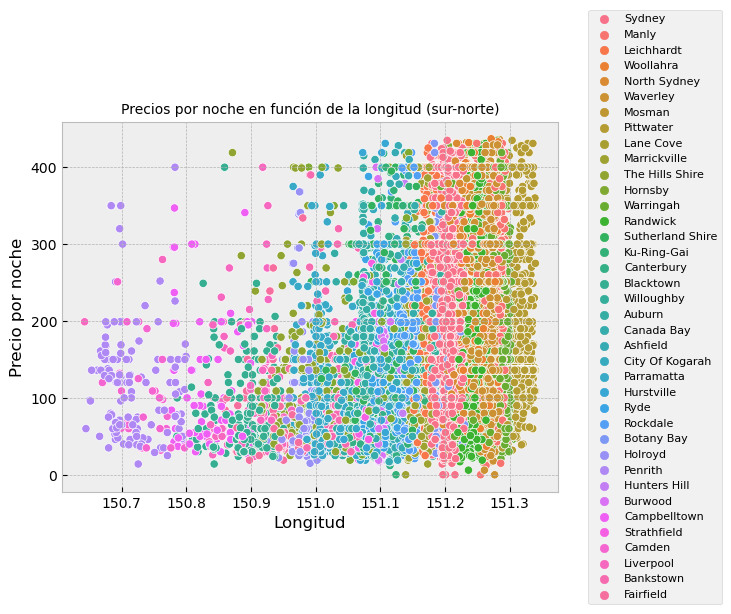

In [25]:
# line chart para los precios en relacion norte-sur
linea = sns.scatterplot(data=df, x="longitude", y="price", hue='neighbourhood_cleansed')
linea.set_xlabel('Longitud')
linea.set_ylabel('Precio por noche')
linea.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), prop={'size': 8})
plt.title("Precios por noche en función de la longitud (sur-norte)", fontsize=10)

Se observa como los listings del norte alcanzan precios mayores en general, con algunos picos en alojamientos bien céntricos.

* Respondiendo a la Pregunta 3

In [26]:
# vemos la media para cada tipo de alojamiento
df[['room_type', 'price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,180.865870
Private room,82.714449
Shared room,51.448331


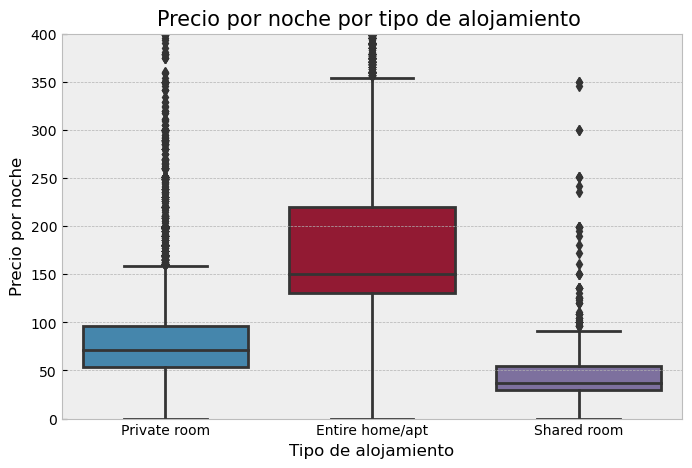

In [27]:
# Hago un gráfico boxplot

plt.figure(figsize=(8,5))
box1 = sns.boxplot(x='room_type', y='price', data = df) 
plt.title("Precio por noche por tipo de alojamiento ", fontsize=15)
plt.ylim(bottom=0, top=400)
box1.set_xlabel('Tipo de alojamiento', fontsize=12)
box1.set_ylabel('Precio por noche', fontsize=12)
plt.show()

Se puede observar que los precios por noche en los alojamientos que son departamentos enteros son significativamente mayores a los de un cuarto privado, y mayores aún que los cuartos compartidos. Habria que realizar un test de hipotesis para inferir sobre la media de precio por noche en cada tipo de alojamiento, haciendo comparaciones de medias.

* Respondiendo a la Pregunta 4

In [28]:
# filtramos por las columnas relacionadas a cantidad de reseñas e identificación
dfaux = df[['id', 'neighbourhood_cleansed', 'number_of_reviews', 'reviews_per_month', 'price', 'latitude', 'longitude']].sort_values(by= 'number_of_reviews', ascending=False)
dfscat = dfaux.iloc[0:200]
dfscat.head()

,id,neighbourhood_cleansed,number_of_reviews,reviews_per_month,price,latitude,longitude
0,12351,Sydney,493,4.83,100.0,-33.865153,151.191896
467,898906,Pittwater,475,6.68,115.0,-33.621014,151.336106
5256,7944819,Botany Bay,474,12.8,84.0,-33.921516,151.190089
144,389876,Sydney,443,5.46,136.0,-33.889261,151.201722
10088,12954762,Rockdale,425,14.0,57.0,-33.937002,151.152735


Text(0, 0.5, 'Longitud')

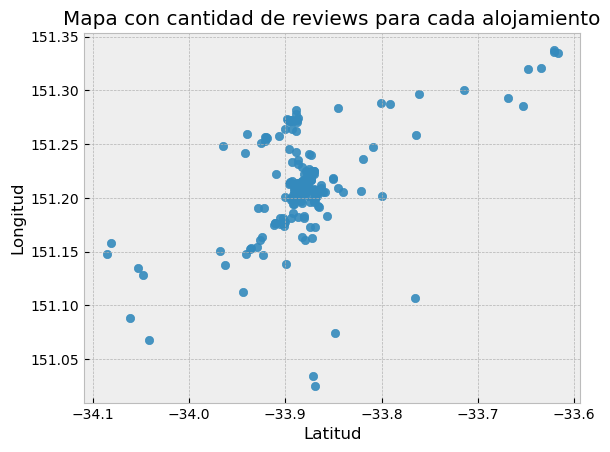

In [29]:
# Scatterplot para detectar los alojamientos más frecuentados y calificados
# con matplotlib

fig, ax = plt.subplots()  
mapeo_color = ax.scatter(dfscat['latitude'], dfscat['longitude'], alpha= 0.9)
ax.set_title('Mapa con cantidad de reviews para cada alojamiento')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

Se observa, como es lógico, que la mayor concentración es en el centro de la ciudad, debido a que los puntos más turísticos se encuentran en esta zona.

Se pueden detectar algunos alojamientos especificos con gran cantidad de reviews, se podria investigar particularmente para entender en detalle por que son tan populares, y si tiene alguna relación el precio. Es posible que estos alojamientos tan frecuentados tengan una muy buena relación precio-calidad, la cual esta cuantificada en los scores de las reviews.

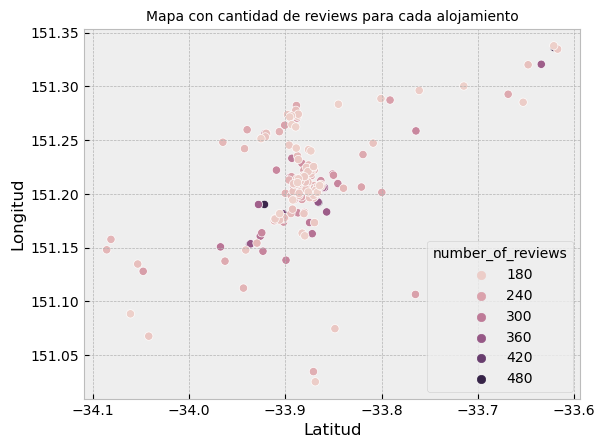

In [30]:
# con seaborn
scat2 = sns.scatterplot(data=dfscat, x="latitude", y="longitude", hue="number_of_reviews")
scat2.set_xlabel('Latitud')
scat2.set_ylabel('Longitud')
plt.title("Mapa con cantidad de reviews para cada alojamiento", fontsize=10)
plt.show()

In [31]:
max_reviews = df['number_of_reviews'].max()
print('El alojamiento con mayor cantidad de reseñas tiene', max_reviews, 'reseñas')
print('Y es el siguiente:')
maxrev = df[df['number_of_reviews'] == max_reviews]
maxrev




El alojamiento con mayor cantidad de reseñas tiene 493 reseñas
Y es el siguiente:


,id,name,description,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


In [32]:
pd.set_option('display.max_colwidth', None)
print('A continuación su descripción:', maxrev['description'])
print('Tiene un precio por noche de:', maxrev['price'])

A continuación su descripción: 0    Come stay with Vinh & Stuart (Awarded as one of Australia's top hosts by Airbnb CEO Brian Chesky & key shareholder Ashton Kutcher. We're Sydney's #1 reviewed hosts too). Find out why we've been positively reviewed 500+ times. Message us and talk first BEFORE you make any reservation request - And please read our listing to the end (hint hint). Everything you need to know is there. We're pretty relaxed hosts, and we fully appreciate staying with someone else, in their home home, is not for every-one. This is not a business, or a hotel. We're casual Airbnb hosts, not hoteliers. If you're just looking for an alternative to an expensive hotel, then we're not for you. Here you'll be treated in the same way we treat family & friends when they stay. So... no fluffy bathrobes... Please say hello and message us *BEFORE* you make your reservation request... It'll help speed things up, and smooth things out... Please read our listing all the way to the end. It 

Efectivamente son el mejor alojamiento, premiados por el CEO de Airbnb y el actor Ashton Kutcher como el mejor de Australia. También tiene las mejores reseñas de la ciudad

#### Visualizaciones con la librería Folium para una mejor navegación del mapa

In [33]:
# con la librería folium

import folium
from folium.plugins import MarkerCluster

# creo el mapa y seteo las coordenadas en Sydney
m = folium.Map(location=[-33.865143, 151.209900], zoom_start=12)

# se crea el objeto MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# creo las listas de los puntos con las coordenadas, y otra lista la cantidad de reviews para cada uno
points = dfscat[['latitude', 'longitude']].values.tolist()
numbers = dfscat['number_of_reviews']

# se asocian las reseñas con las coordenadas
for point, number in zip(points, numbers):
    folium.Marker(location=point, popup=str(number)).add_to(marker_cluster)
    
m

In [34]:
from folium.plugins import HeatMap

In [35]:
max_amount = float(df['price'].max())

folium_hmap = folium.Map(location=[-33.865143, 151.209900],
                        zoom_start=12,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_22900\2754428639.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['price'])),


### Recomendaciones en base a los insights observados:

Después de realizar el análisis exploratorio de los datos, se pueden hacer las siguientes recomendaciones para fijar precios más competitivos en los alojamiento de Airbnb en Sydney:

Si el alojamiento se encuentra en barrios exclusivos como lo son Pittwater, Mosman, Manly, Woollahra y Warringah, se debería considerar que los precios pueden ser muy elevados debido al status que estos barrios poseen, y se entiende que en los mismos se alojan personas con un gran poder adquisitivo que buscan estadías de lujo en las afueras de la ciudad.

Considerar que alojamientos muy céntricos poseen la ventaja de estar bien ubicados para el turismo, lo cual ofrece de por si un plus en el precio sin tener en cuenta las otras características del alojamiento.

Los alojamientos que son departamentos enteros, tienen la posibilidad de establecer precios significativamente más altos que los demás, ya que tienen total privacidad, a diferencia de un cuarto privado dentro de otra propiedad y obviamente más que un cuarto compartido.

En cuanto a la ubicación, también hay una tendencia a precios más elevados en el norte de la ciudad, y más cerca de la costa, lo cual debería ser tenido en cuenta a la hora de fijar un precio.